In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv('train.csv')

# Data Exploration

In [9]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [10]:
df.shape

(27674, 83)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27674 entries, 0 to 27673
Data columns (total 83 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   patient_id                             27674 non-null  int64  
 1   patient_race                           12522 non-null  object 
 2   payer_type                             24838 non-null  object 
 3   patient_state                          27595 non-null  object 
 4   patient_zip3                           27674 non-null  int64  
 5   patient_age                            27674 non-null  int64  
 6   patient_gender                         27674 non-null  object 
 7   bmi                                    8749 non-null   float64
 8   breast_cancer_diagnosis_code           27674 non-null  object 
 9   breast_cancer_diagnosis_desc           27674 non-null  object 
 10  breast_cancer_diagnosis_year           27674 non-null  int64  
 11  me

In [12]:
df.describe()

,patient_id,patient_zip3,patient_age,bmi,breast_cancer_diagnosis_year,population,density,age_median,age_under_10,age_10_to_19,age_20s,age_30s,age_40s,age_50s,age_60s,age_70s,age_over_80,male,female,married,divorced,never_married,widowed,family_size,family_dual_income,income_household_median,income_household_under_5,income_household_5_to_10,income_household_10_to_15,income_household_15_to_20,income_household_20_to_25,income_household_25_to_35,income_household_35_to_50,income_household_50_to_75,income_household_75_to_100,income_household_100_to_150,income_household_150_over,income_household_six_figure,income_individual_median,home_ownership,housing_units,home_value,rent_median,rent_burden,education_less_highschool,education_highschool,education_some_college,education_bachelors,education_graduate,education_college_or_above,education_stem_degree,labor_force_participation,unemployment_rate,self_employed,farmer,race_white,race_black,race_asian,race_native,race_pacific,race_other,race_multiple,hispanic,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,treatment_pd
count,27674.000000,27674.000000,27674.000000,8749.000000,27674.000000,27674.000000,27674.000000,27674.000000,27674.000000,27674.000000,27674.000000,27674.000000,27674.000000,27674.000000,27674.000000,27674.000000,27674.000000,27674.000000,27674.000000,27674.000000,27674.000000,27674.000000,27674.000000,27671.000000,27671.000000,27671.000000,27671.000000,27671.000000,27671.000000,27671.000000,27671.000000,27671.000000,27671.000000,27671.000000,27671.000000,27671.000000,27671.000000,27671.000000,27674.000000,27671.000000,27674.000000,2.767100e+04,27671.000000,27671.000000,27674.000000,27674.000000,27674.000000,27674.000000,27674.000000,27674.000000,27674.000000,27674.000000,27674.000000,25482.000000,25482.000000,27674.000000,27674.000000,27674.000000,27674.000000,27674.000000,27674.000000,27674.000000,27674.000000,27674.000000,27671.000000,27671.000000,27674.000000,27674.000000,27674.000000,27674.000000
mean,549586.828612,522.024752,54.456421,29.277804,2016.486449,19919.850799,1655.023291,40.674047,11.117255,12.883595,13.143119,12.782061,12.076926,13.573161,12.702796,7.704455,4.015896,50.039854,49.960217,48.004685,12.643944,33.461399,5.889291,3.192892,51.865654,75077.505652,3.281258,2.545273,4.131138,3.942735,4.079859,8.384419,11.467330,16.722793,12.623016,15.798970,17.022759,32.821730,36950.664915,66.651489,7329.758321,3.231313e+05,1224.420483,31.275935,11.816588,27.984008,28.493846,19.314606,12.391834,31.706440,43.252357,61.654640,5.968248,12.998718,2.053066,70.338452,11.691873,5.165834,0.855125,0.122209,5.352033,6.473921,17.862817,13.432810,13.324371,4.603184,28.061654,8.573778,7.079766,134.218472
std,260306.291181,292.405178,11.202089,5.636923,1.058602,13465.788962,3639.259482,4.026393,1.535440,1.880894,3.234639,2.385573,1.242096,1.672587,2.560234,2.149805,1.228584,1.646052,1.646014,7.428715,2.088874,7.861143,1.545184,0.218227,8.302217,22012.394837,1.650857,1.494786,1.858765,1.531102,1.409643,2.298145,2.660072,2.810108,1.957260,3.316432,9.412335,11.690135,9080.017370,14.198180,4852.472242,2.357955e+05,422.174120,4.761163,5.175545,7.944448,5.094515,6.421814,6.198422,12.181170,4.553298,6.105686,2.014498,3.266231,3.272074,17.750690,12.605508,6.386273,2.582592,0.476978,5.955250,3.539440,17.513898,3.801799,5.724183,6.595424,4.893231,4.306563,3.098581,187.759654
min,100051.000000,6.000000,19.000000,14.000000,2015.000000,636.000000,0.821739,20.600000,0.000000,6.314286,5.925000,1.500000,0.800000,0.000000,0.200000,0.000000,0.000000,39.725000,38.400000,0.900000,0.200000,13.440000,0.000000,2.550370,19.312121,18465.409090,0.711765,0.361538,0.647059,1.027778,0.840000,1.860000,1.700000,4.950000,3.100000,1.671739,0.840000,3.436957,4316.000000,15.850000,0.000000,4.316362e+04,448.400000,16.692308,0.000000,0.000000,7.200000,2.465714,2.094118,7.048837,23.914706,30.700000,0.986667,2.262963,0.000000,1.640000,0.041176,0.000000,0.000000,0.000000,0.002564,0.433333,0.060714,4

In [13]:
df.isnull().sum()

patient_id                                   0
patient_race                             15152
payer_type                                2836
patient_state                               79
patient_zip3                                 0
patient_age                                  0
patient_gender                               0
bmi                                      18925
breast_cancer_diagnosis_code                 0
breast_cancer_diagnosis_desc                 0
breast_cancer_diagnosis_year                 0
metastatic_cancer_diagnosis_code             0
metastatic_first_treatment                   0
metastatic_first_treatment_type          11024
metastatic_first_novel_treatment         27441
metastatic_first_novel_treatment_type    27441
region                                     223
division                                   223
population                                   0
density                                      0
age_median                                   0
age_under_10 

# Data Cleaning

In [14]:
#Exploring the unique values of patient_state to understand the states of patients
unique_values = df['patient_state'].unique()

print("Unique values in the column:")
print(unique_values)

Unique values in the column:
['CA' 'OH' 'TX' 'NY' 'IN' 'NM' 'AL' 'FL' 'WA' 'VA' 'IL' 'PA' 'WV' 'MO'
 'NC' 'SC' 'GA' 'MD' 'LA' 'KY' 'MI' 'AR' 'MN' 'CO' 'TN' 'AZ' 'NV' 'NJ'
 'NH' 'OR' 'MS' 'ID' 'CT' 'ME' 'WI' 'WY' 'IA' 'OK' 'MA' 'PR' 'SD' nan 'HI'
 'MT' 'KS' 'UT' 'NE' 'DE' 'VT' 'ND' 'DC' 'RI' 'AK']


In [15]:
unique_count = df['patient_state'].nunique()
print("Number of unique values in the column:", unique_count)

Number of unique values in the column: 52


In [37]:
# Fill null values in the 'payer_type' column with 'UNINSURED'
df['payer_type'] = df['payer_type'].fillna('UNINSURED')

In [20]:
# Dropping columns with a more than 80 percent of missing values
df = df.drop(['patient_race', 'bmi', 'metastatic_first_treatment_type', 'metastatic_first_novel_treatment', 'metastatic_first_novel_treatment_type'], axis=1)

In [68]:
# Dropping patient_gender since the gender present is only Female
df.drop('patient_gender', inplace=True, axis=1)

In [22]:
# Filling null values in 'self_employed' column with the median
df['self_employed'].fillna(df['self_employed'].median(), inplace=True)

In [23]:
# Filling null values in 'farmer' column with the median
df['farmer'].fillna(df['farmer'].median(), inplace=True)

In [25]:
# Drop rows with null values in below columns
df.dropna(subset=['family_size', 'family_dual_income', 'income_household_median','home_ownership', 'home_value', 'rent_median','rent_burden', 'poverty', 'limited_english'], inplace=True)

In [28]:
# Convert categorical columns to the appropriate data types
df['patient_gender'] = df['patient_gender'].astype('category')
df['breast_cancer_diagnosis_code'] = df['breast_cancer_diagnosis_code'].astype('category')
df['breast_cancer_diagnosis_desc'] = df['breast_cancer_diagnosis_desc'].astype('category')
df['metastatic_cancer_diagnosis_code'] = df['metastatic_cancer_diagnosis_code'].astype('category')
df['metastatic_first_treatment'] = df['metastatic_first_treatment'].astype('category')
df['region'] = df['region'].astype('category')
df['division'] = df['division'].astype('category')

In [29]:
# Verify the data types after cleaning
df.dtypes

patient_id                             int64
payer_type                            object
patient_state                         object
patient_zip3                           int64
patient_age                            int64
patient_gender                      category
breast_cancer_diagnosis_code        category
breast_cancer_diagnosis_desc        category
breast_cancer_diagnosis_year           int64
metastatic_cancer_diagnosis_code    category
metastatic_first_treatment          category
region                              category
division                            category
population                             int64
density                              float64
age_median                           float64
age_under_10                         float64
age_10_to_19                         float64
age_20s                              float64
age_30s                              float64
age_40s                              float64
age_50s                              float64
age_60s   

# Exploratory Data Analysis

In [30]:
pip install matplotlib seaborn

In [31]:
pip install matplotlib scipy

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster import hierarchy
# Set the style for Seaborn
sns.set(style="whitegrid")

# Enable inline plotting for Jupyter Notebook
%matplotlib inline

In [33]:
# Observed the zips in each state
state_zip_mapping = df.groupby('patient_state')['patient_zip3'].unique()

for state, unique_zips in state_zip_mapping.items():
    print(f"State: {state}, Unique ZIPs: {unique_zips}")

State: AK, Unique ZIPs: [995 996]
State: AL, Unique ZIPs: [356 362 368 860 360 365 350 361 354 352 366 357 723 359 363 351 472 358
 355]
State: AR, Unique ZIPs: [723 727 722 716 726 717 721 725 720 724 729 718 719 728 656 922]
State: AZ, Unique ZIPs: [853 850 852 857 864 863 851 860 856 855 591 865  70 782]
State: CA, Unique ZIPs: [917 928 900 906 913 925 946 931 923 902 959 920 953 945 915 919 950 922
 910 912 934 930 921 927 914 933 940 924 926 957 907 937 932 911 958 941
 947 916 952 905 956 960 951 936 949 939 935 944 908 943 903 954 549 904
 918 156 961 955 118 633 857 974 871 948 731 683 805 631 234 972 342 333
 973 600 100 112 117 844 310]
State: CO, Unique ZIPs: [804 800 805 802 816 815 811 810 806 801 809 814 803 812 813 808 807 890
  78 282 920 935 953]
State: CT, Unique ZIPs: [ 67  68  60  61  64  63  66  65  62  74  69 105 315]
State: DC, Unique ZIPs: [200]
State: DE, Unique ZIPs: [197 198 199 295 191 190]
State: FL, Unique ZIPs: [330 346 337 322 327 331 326 335 325 329 336

   patient_id patient_state  patient_zip3  patient_age patient_gender  \
0      994155            CA           917           46              F   
1      154389            OH           451           63              F   
2      387343            TX           773           53              F   
3      921275            CA           928           50              F   
4      803454            NY           112           39              F   

  breast_cancer_diagnosis_code  \
0                       C50811   
1                       C50412   
2                       C50212   
3                         1749   
4                         1749   

                        breast_cancer_diagnosis_desc  \
0  Malignant neoplasm of ovrlp sites of right fem...   
1  Malig neoplasm of upper-outer quadrant of left...   
2  Malig neoplasm of upper-inner quadrant of left...   
3  Malignant neoplasm of breast (female), unspeci...   
4  Malignant neoplasm of breast (female), unspeci...   

   breast_cancer_di

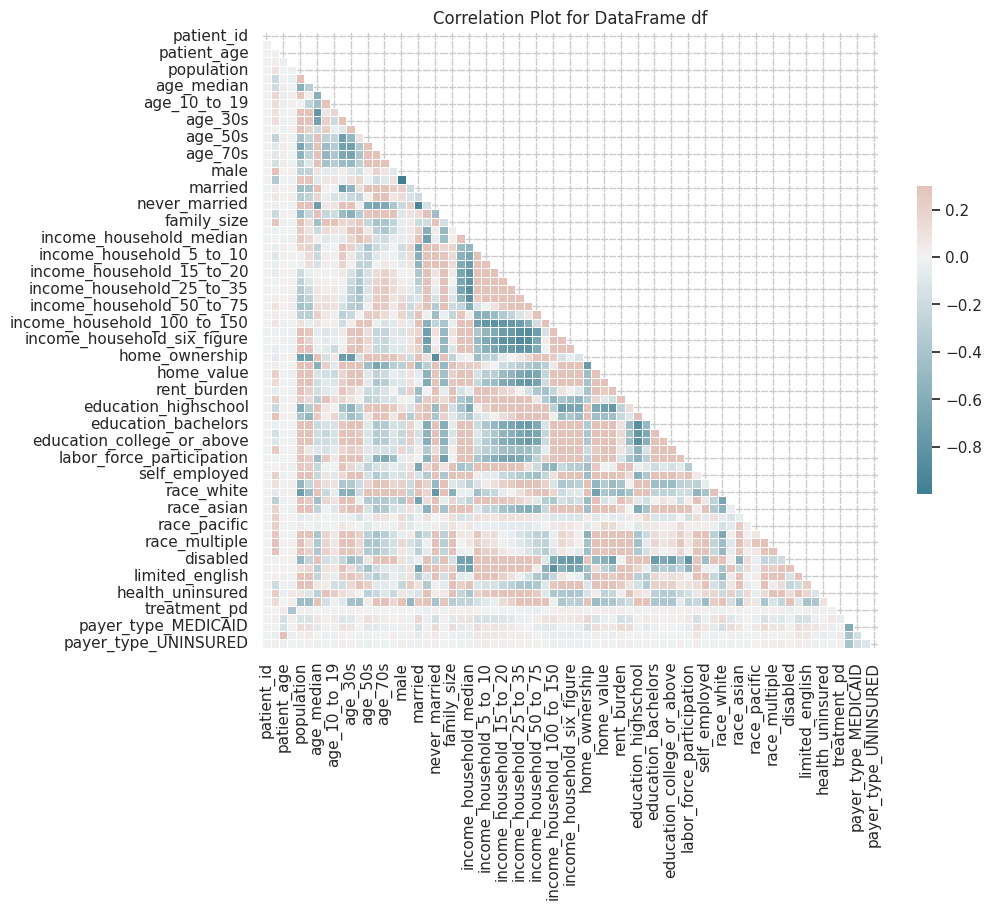

In [34]:
# Plotted Correlation plot for the entire dataframe to understand correlations
# Select only the 'payer_type' column
payer_type_column = df[['payer_type']]

# Perform one-hot encoding
encoded_payer_type = pd.get_dummies(payer_type_column, prefix='payer_type', dtype=int)

# Concatenate the encoded DataFrame with the original DataFrame
df_encoded = pd.concat([df.drop(columns=['payer_type']), encoded_payer_type], axis=1)

# Print the encoded DataFrame
print(df_encoded.head())
# Compute the correlation matrix

corr = df_encoded.corr(numeric_only=True)

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Choose a color palette
cmap = sns.diverging_palette(220, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Correlation Plot for DataFrame df')
plt.show()


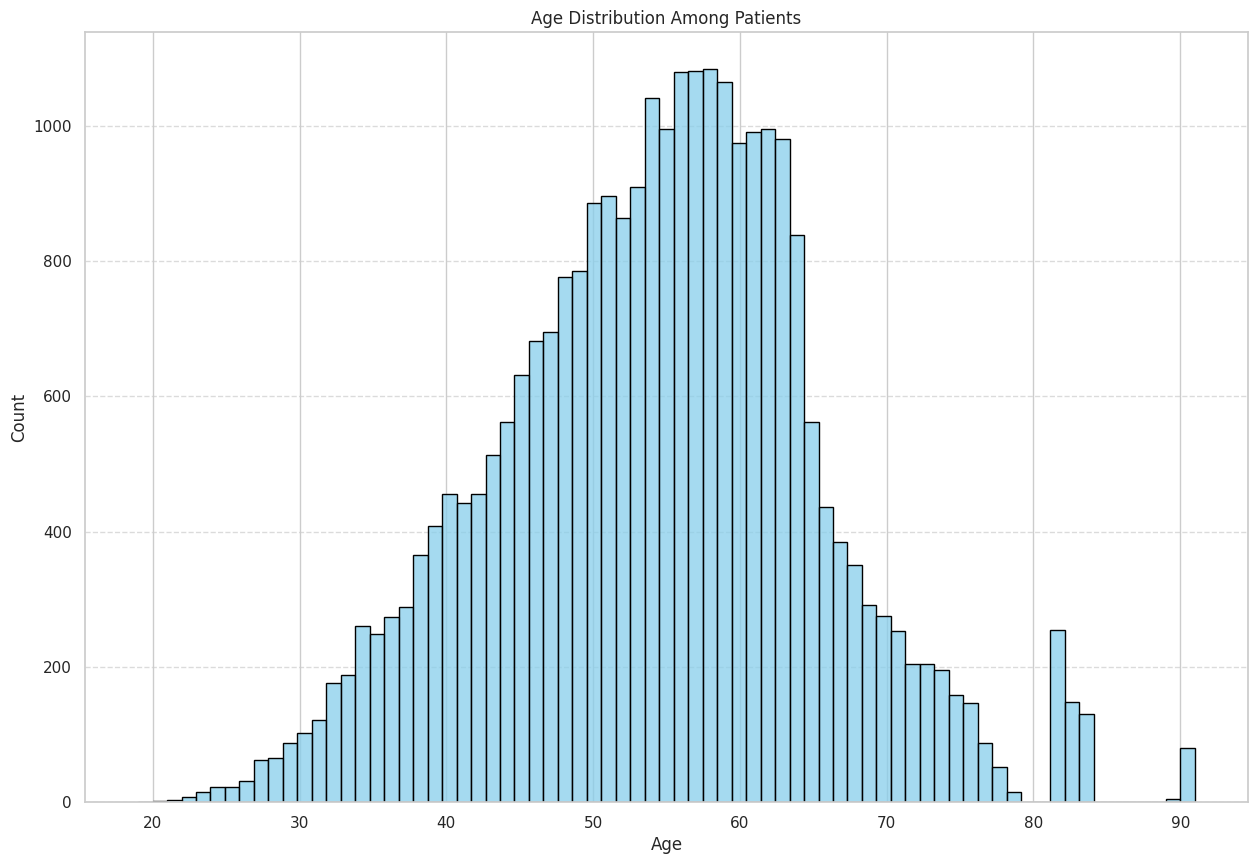

In [43]:
# Plotted distribution of patients' age.

plt.figure(figsize=(15, 10))
sns.histplot(df['patient_age'], color='skyblue', edgecolor='black')
plt.title("Age Distribution Among Patients")
plt.xlabel("Age")
plt.ylabel("Count")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


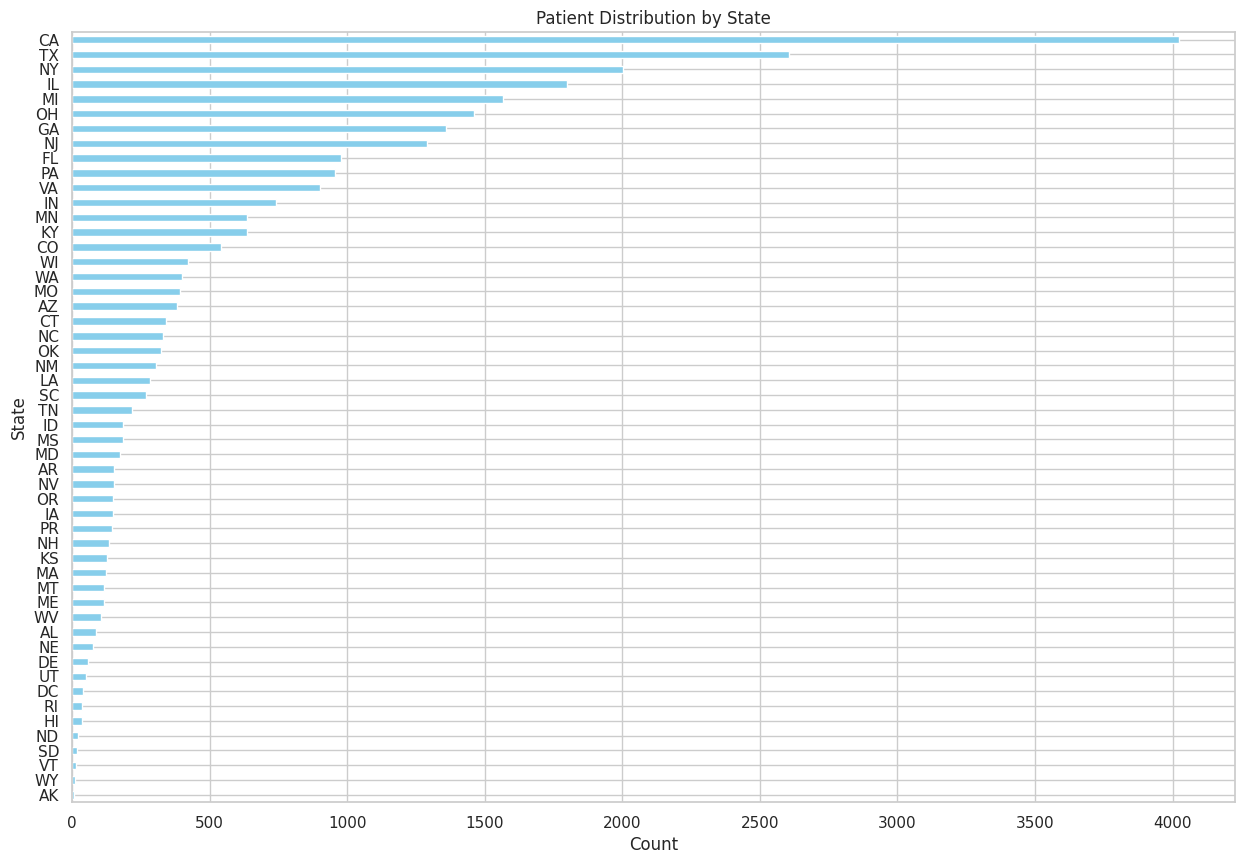

In [41]:
#Plotted distribution of Patient with respect to each state
plt.figure(figsize=(15, 10))

# Sort the data by count in ascending order
state_distribution = df['patient_state'].value_counts()
state_distribution_sorted = state_distribution.sort_values()
state_distribution_sorted.plot(kind='barh', color='skyblue')
plt.title("Patient Distribution by State")
plt.xlabel("Count")
plt.ylabel("State")
plt.show()

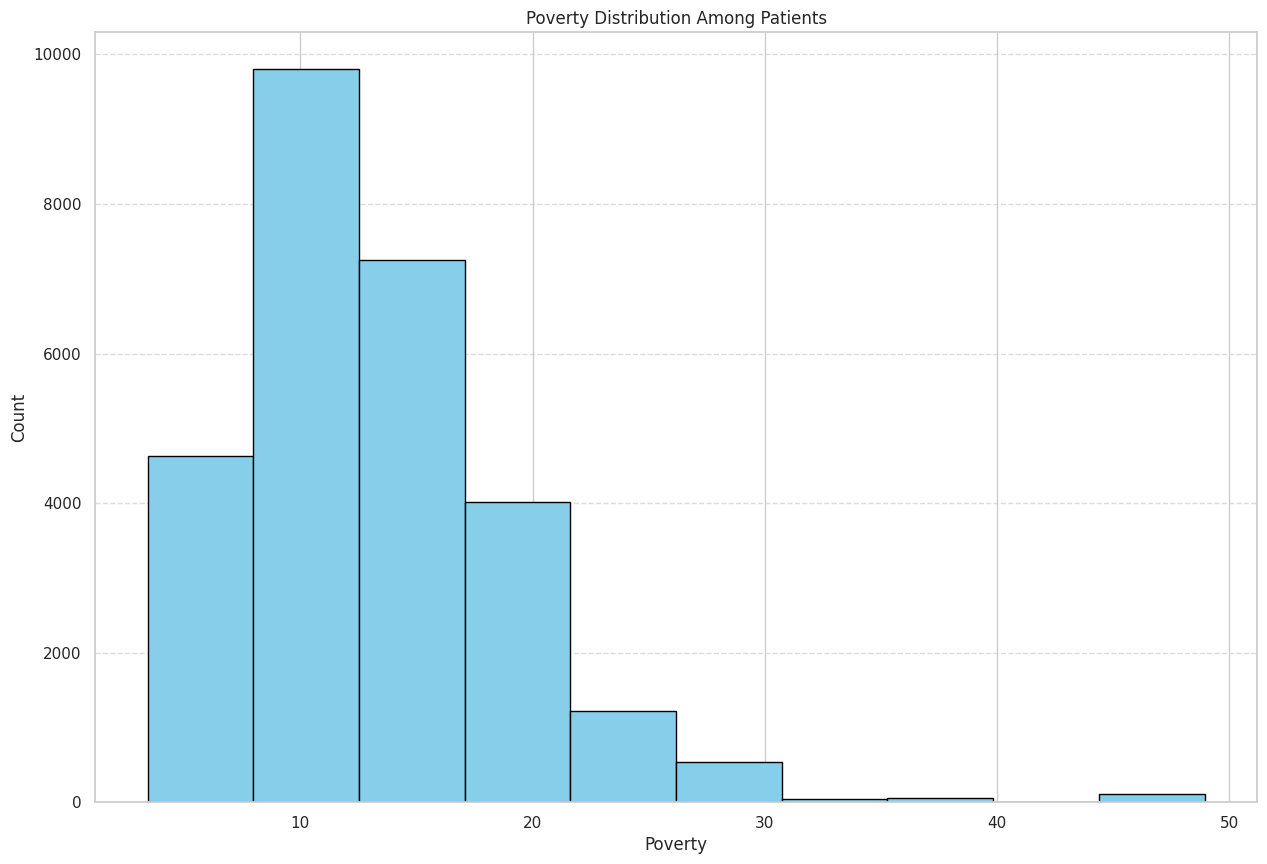

In [44]:
# Plotted the poverty distribution of patients
plt.figure(figsize=(15, 10))
plt.hist(df['poverty'], color='skyblue', edgecolor='black')
plt.title("Poverty Distribution Among Patients")
plt.xlabel("Poverty")
plt.ylabel("Count")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

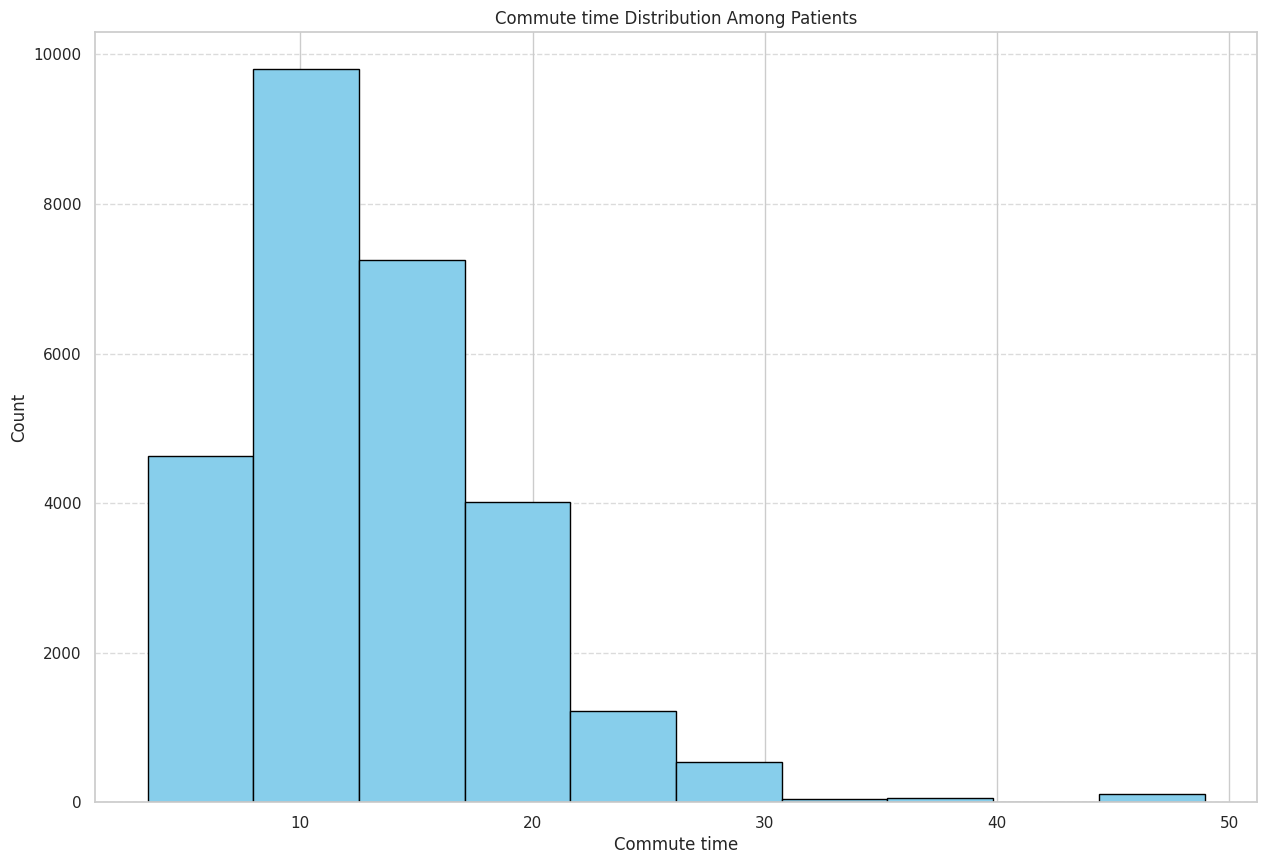

In [45]:
# Plotted the commute time distribution
plt.figure(figsize=(15, 10))
plt.hist(df['poverty'], color='skyblue', edgecolor='black')
plt.title("Commute time Distribution Among Patients")
plt.xlabel("Commute time")
plt.ylabel("Count")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

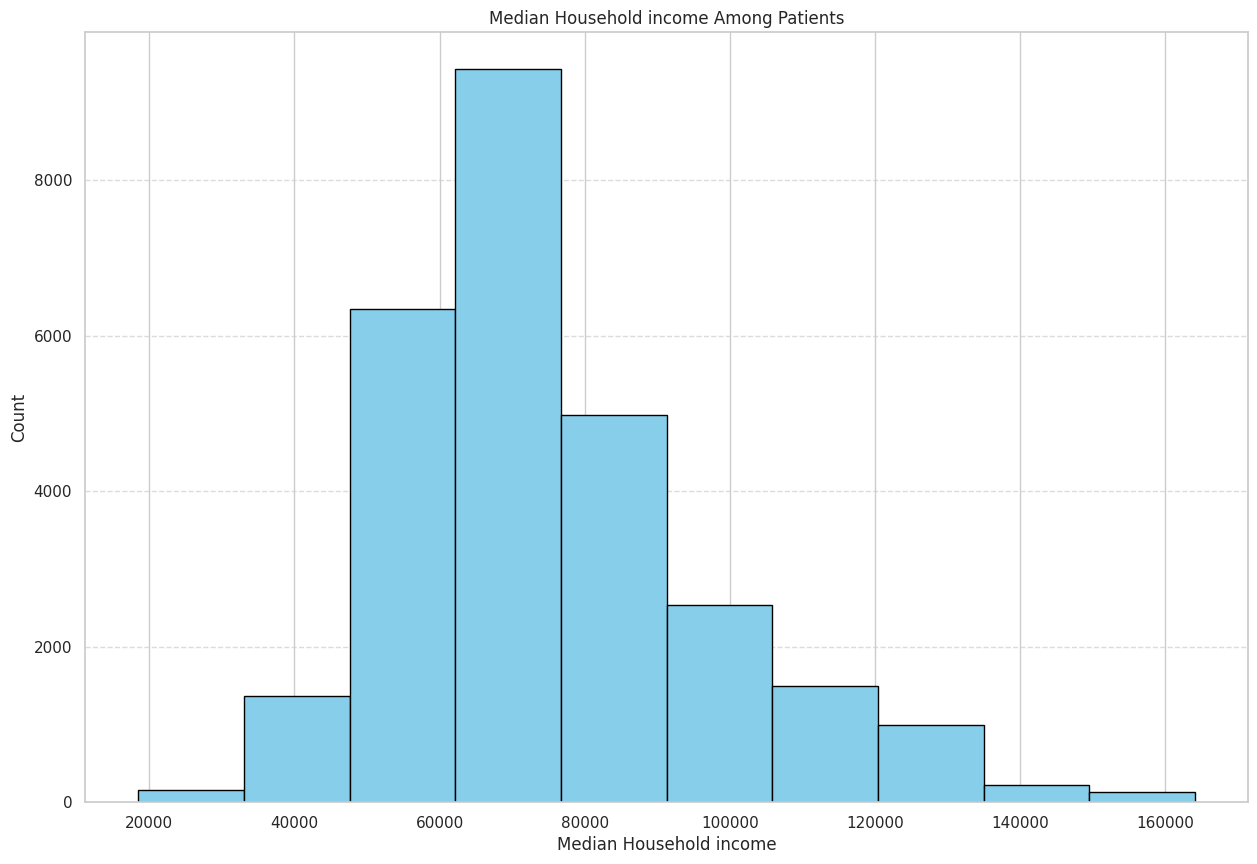

In [46]:
# Plotted the median Household income distribution
plt.figure(figsize=(15, 10))
plt.hist(df['income_household_median'], color='skyblue', edgecolor='black')
plt.title("Median Household income Among Patients")
plt.xlabel("Median Household income")
plt.ylabel("Count")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

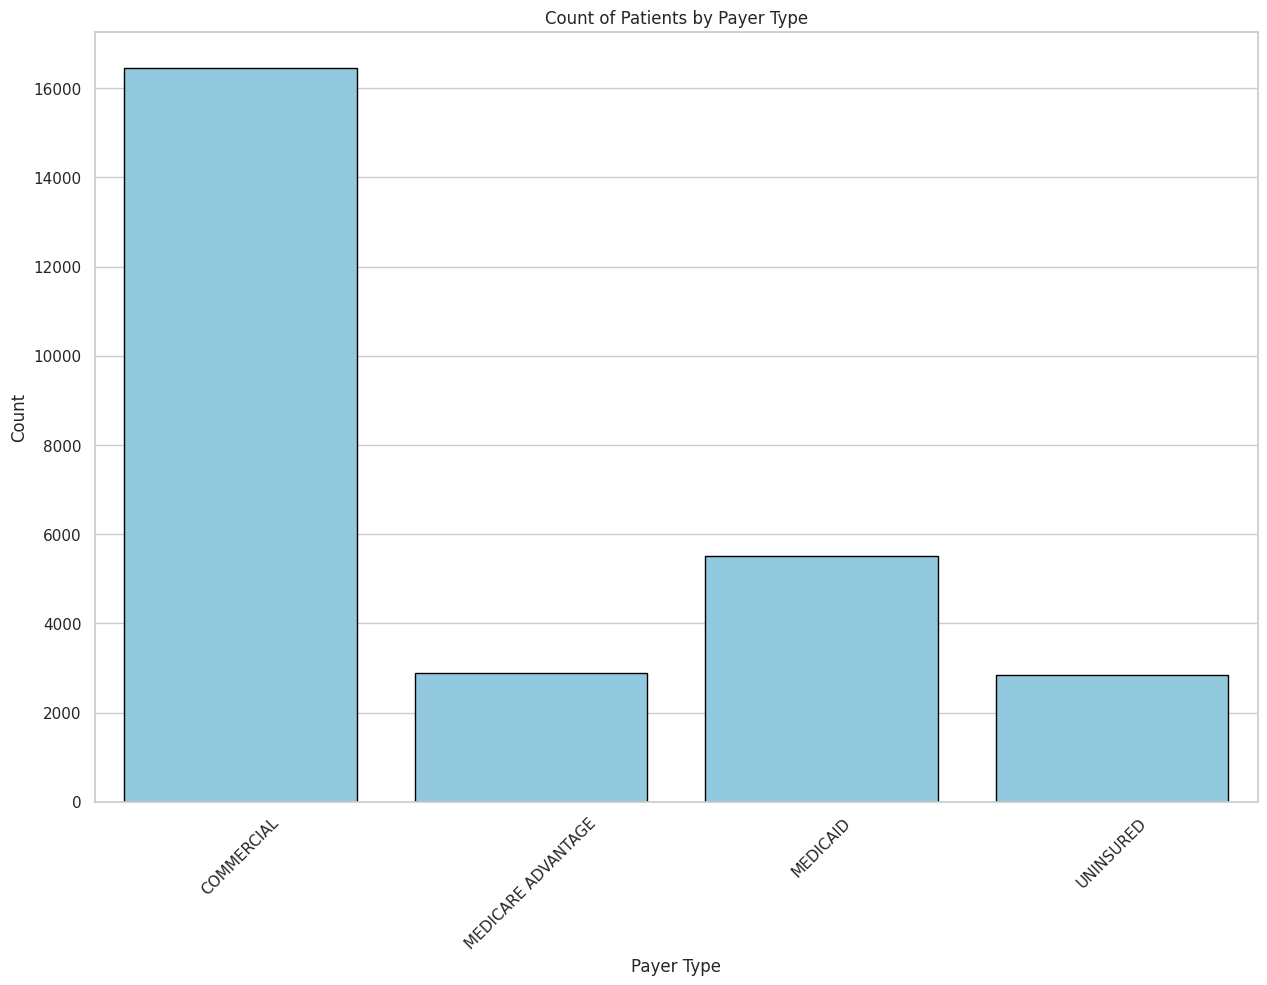

In [47]:
# Plotted the count plot of patients with respect to payer type
plt.figure(figsize=(15, 10))
sns.countplot(data=df, x="payer_type", color='skyblue', edgecolor='black')
plt.title("Count of Patients by Payer Type")
plt.xlabel("Payer Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

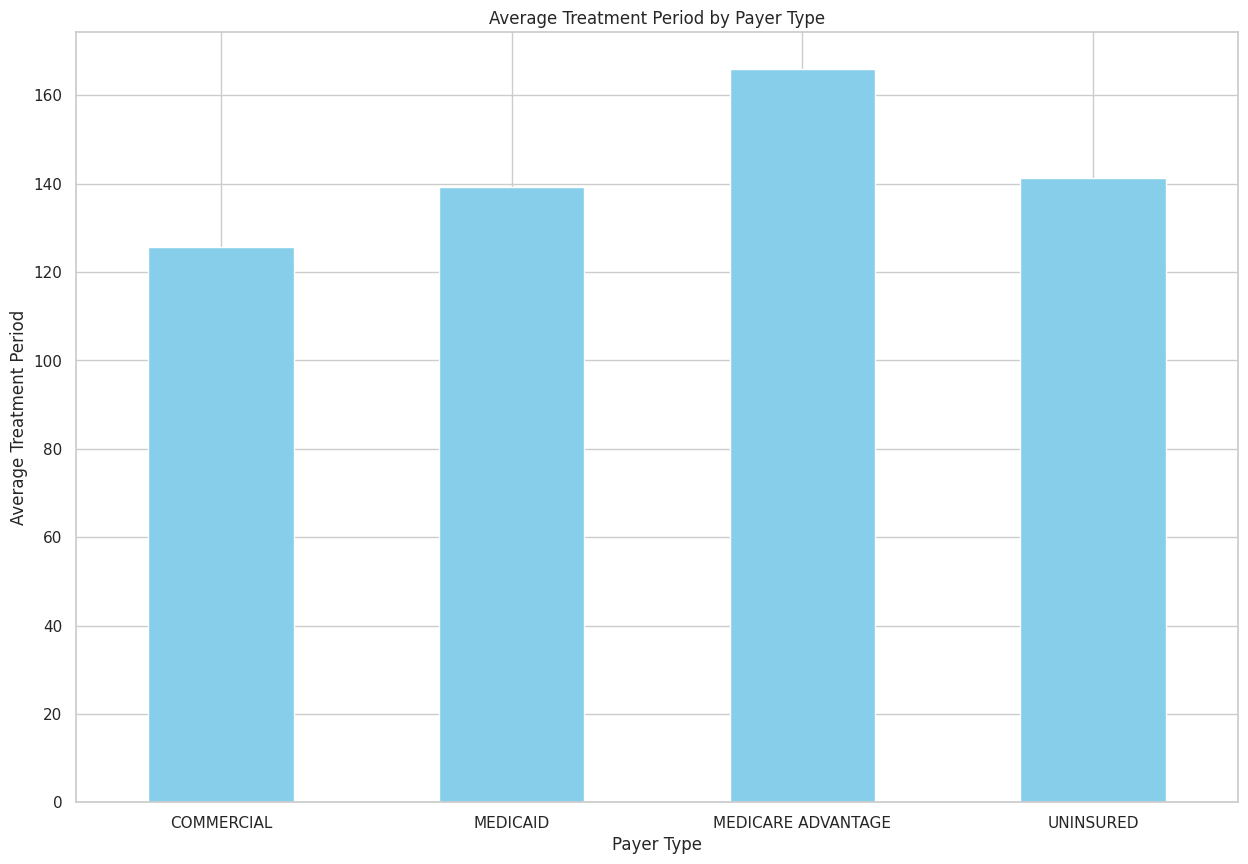

In [48]:
# Plotted Average treatment period with respect to each payer type
avg_treatment_period = df.groupby("payer_type")["treatment_pd"].mean()

# Create a bar plot
plt.figure(figsize=(15, 10))
avg_treatment_period.plot(kind="bar", color="skyblue")
plt.title("Average Treatment Period by Payer Type")
plt.xlabel("Payer Type")
plt.ylabel("Average Treatment Period")
plt.xticks(rotation=0)
plt.show()

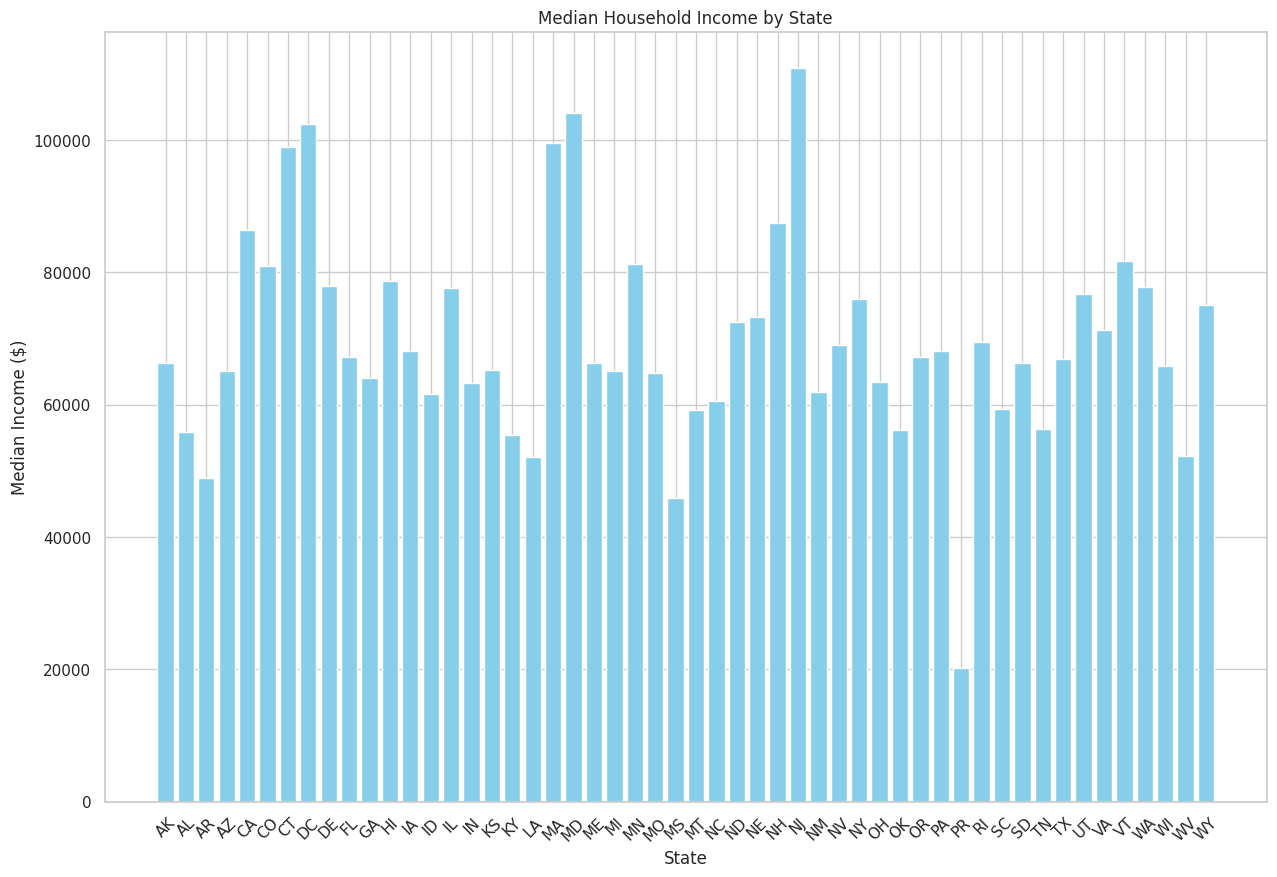

In [49]:
# Plotted Median Income by each state
median_income_by_state = df.groupby("patient_state")["income_household_median"].median()

# Create a bar chart for state vs. median income
plt.figure(figsize=(15, 10))
plt.bar(median_income_by_state.index, median_income_by_state.values, color='skyblue')
plt.title("Median Household Income by State")
plt.xlabel("State")
plt.ylabel("Median Income ($)")
plt.xticks(rotation=45)
plt.show()

<ipython-input-50-4347a6b99dbf>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(merged_data['State'], rotation=45, ha='right')


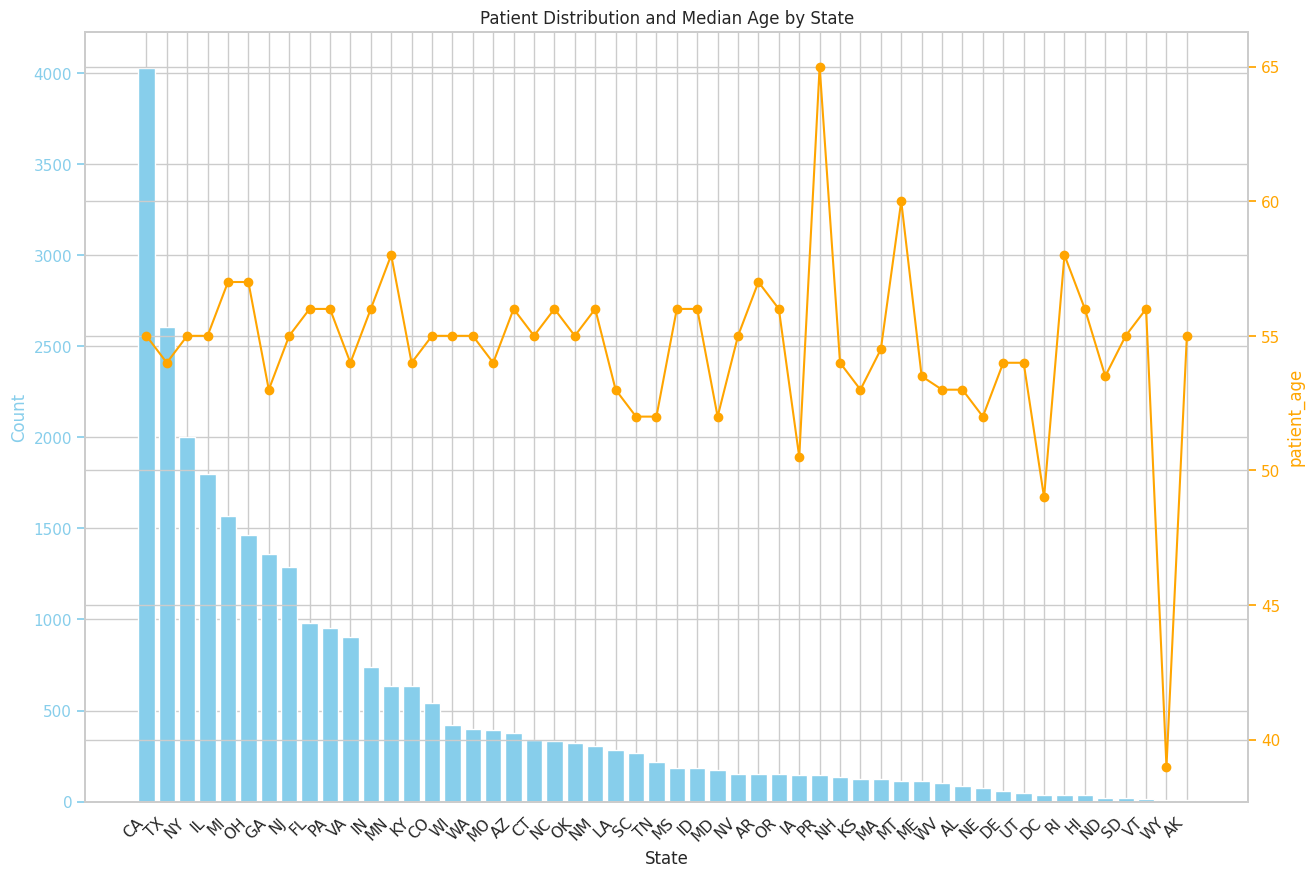

In [50]:
# Assuming state_distribution is a DataFrame with 'State' and 'Count' columns
state_distribution = df['patient_state'].value_counts().reset_index()
state_distribution.columns = ['State', 'Count']

# Calculate median age by state
median_age_by_state = df.groupby('patient_state')['patient_age'].median().reset_index()

# Merge state_distribution with median_age_by_state
merged_data = pd.merge(state_distribution, median_age_by_state, left_on='State', right_on='patient_state', how='left')

# Plot the distribution of patients by state with median age
fig, ax1 = plt.subplots(figsize=(15, 10))

# Bar plot for patient distribution
ax1.bar(merged_data['State'], merged_data['Count'], color='skyblue', label='Patient Count')
ax1.set_xlabel('State')
ax1.set_ylabel('Count', color='skyblue')
ax1.tick_params('y', colors='skyblue')
ax1.set_xticklabels(merged_data['State'], rotation=45, ha='right')

# Line plot for median age
ax2 = ax1.twinx()
ax2.plot(merged_data['State'], merged_data['patient_age'], color='orange', label='Median Age', marker='o')
ax2.set_ylabel('patient_age', color='orange')
ax2.tick_params('y', colors='orange')
plt.title("Patient Distribution and Median Age by State")
plt.show()

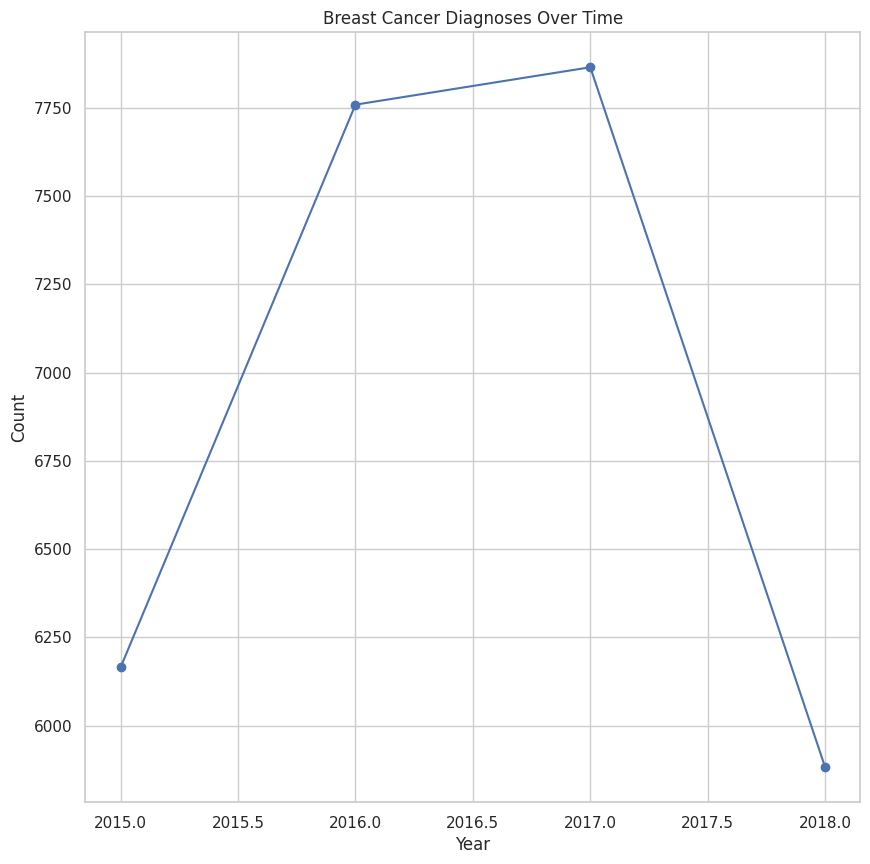

In [51]:
# Create a line plot for a time series column (e.g., 'breast_cancer_diagnosis_year')
year_counts = df['breast_cancer_diagnosis_year'].value_counts().sort_index()
plt.figure(figsize=(10, 10))
plt.plot(year_counts.index, year_counts.values, marker='o')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Breast Cancer Diagnoses Over Time')
plt.grid(True)
plt.show()

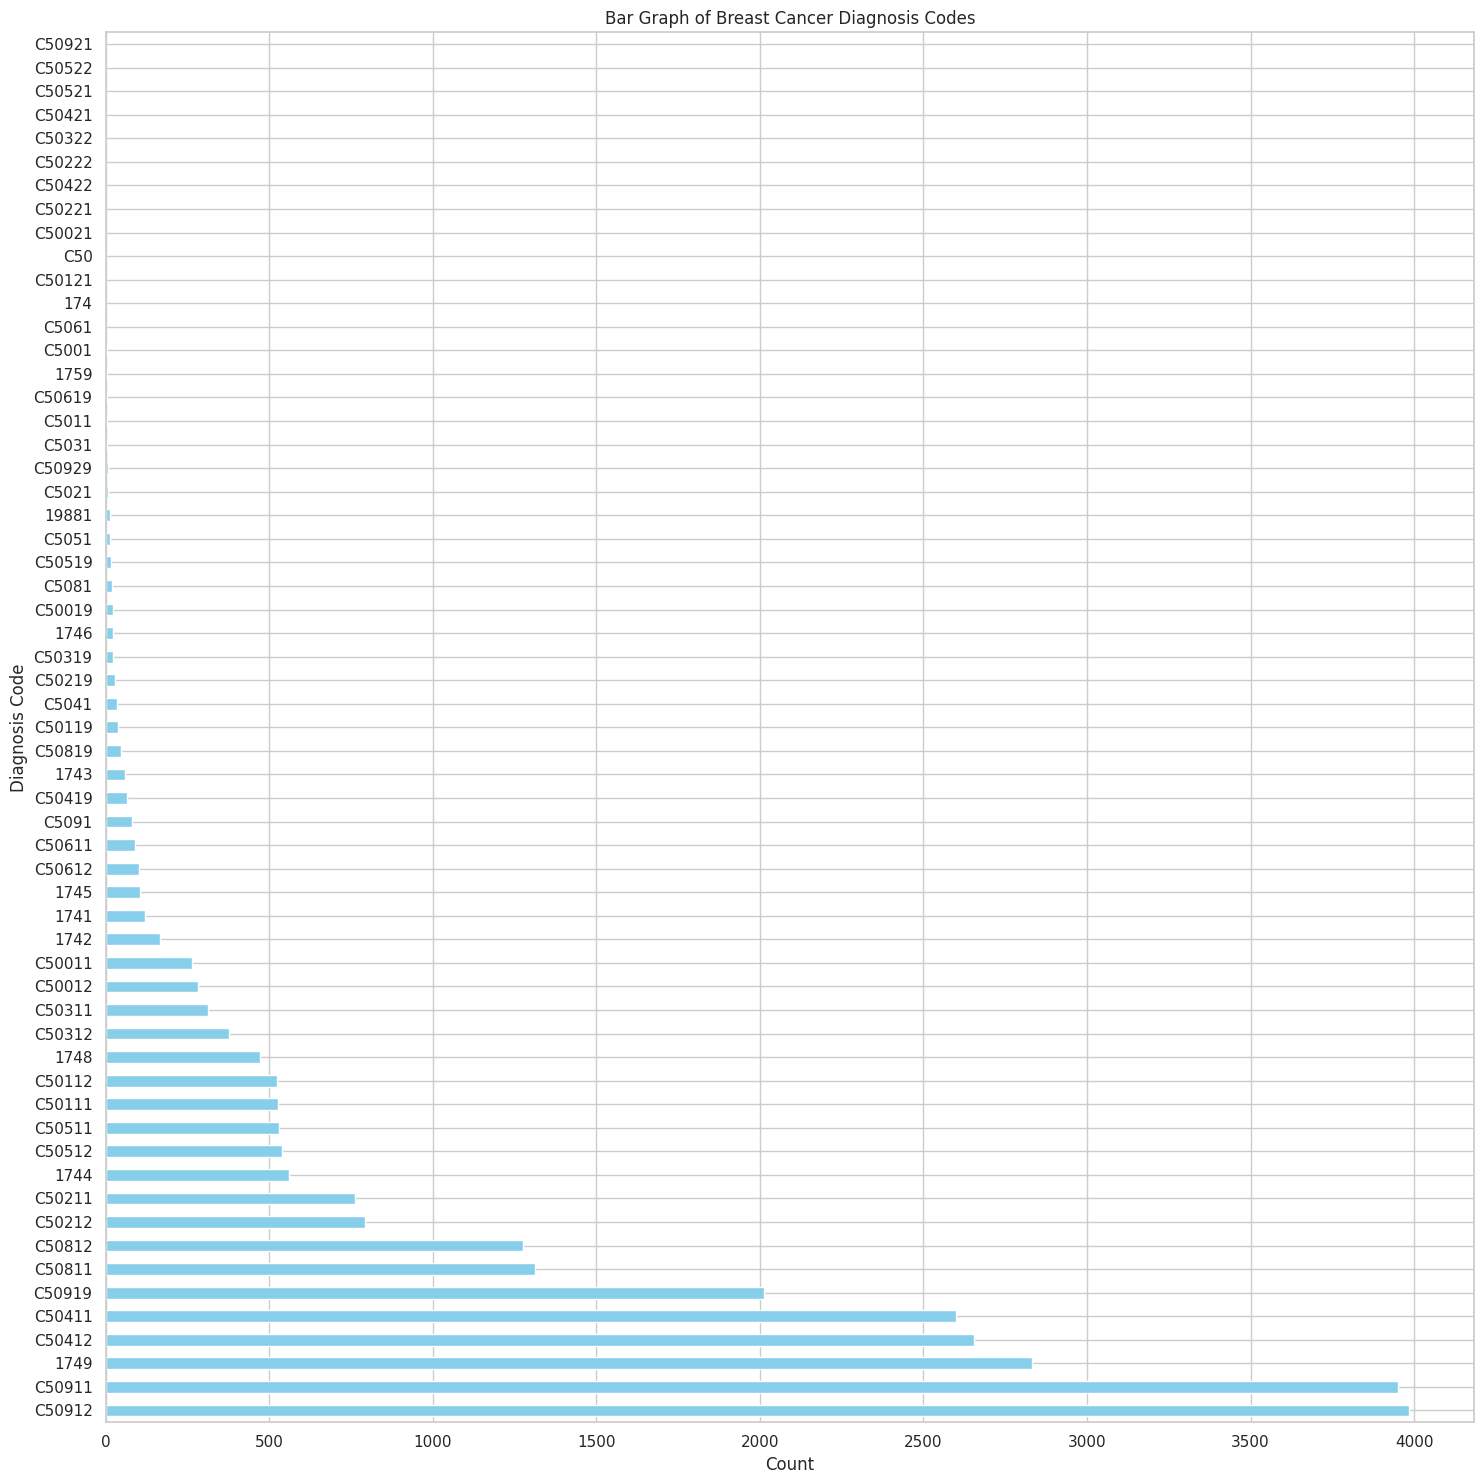

In [52]:
diagnosis_codes = df['breast_cancer_diagnosis_code'].value_counts()
# Transpose the bar plot
plt.figure(figsize=(15, 15))
diagnosis_codes.plot(kind='barh', color='skyblue')
plt.ylabel('Diagnosis Code')
plt.xlabel('Count')
plt.title('Bar Graph of Breast Cancer Diagnosis Codes')
plt.tight_layout()

# Display the transposed plot
plt.show()

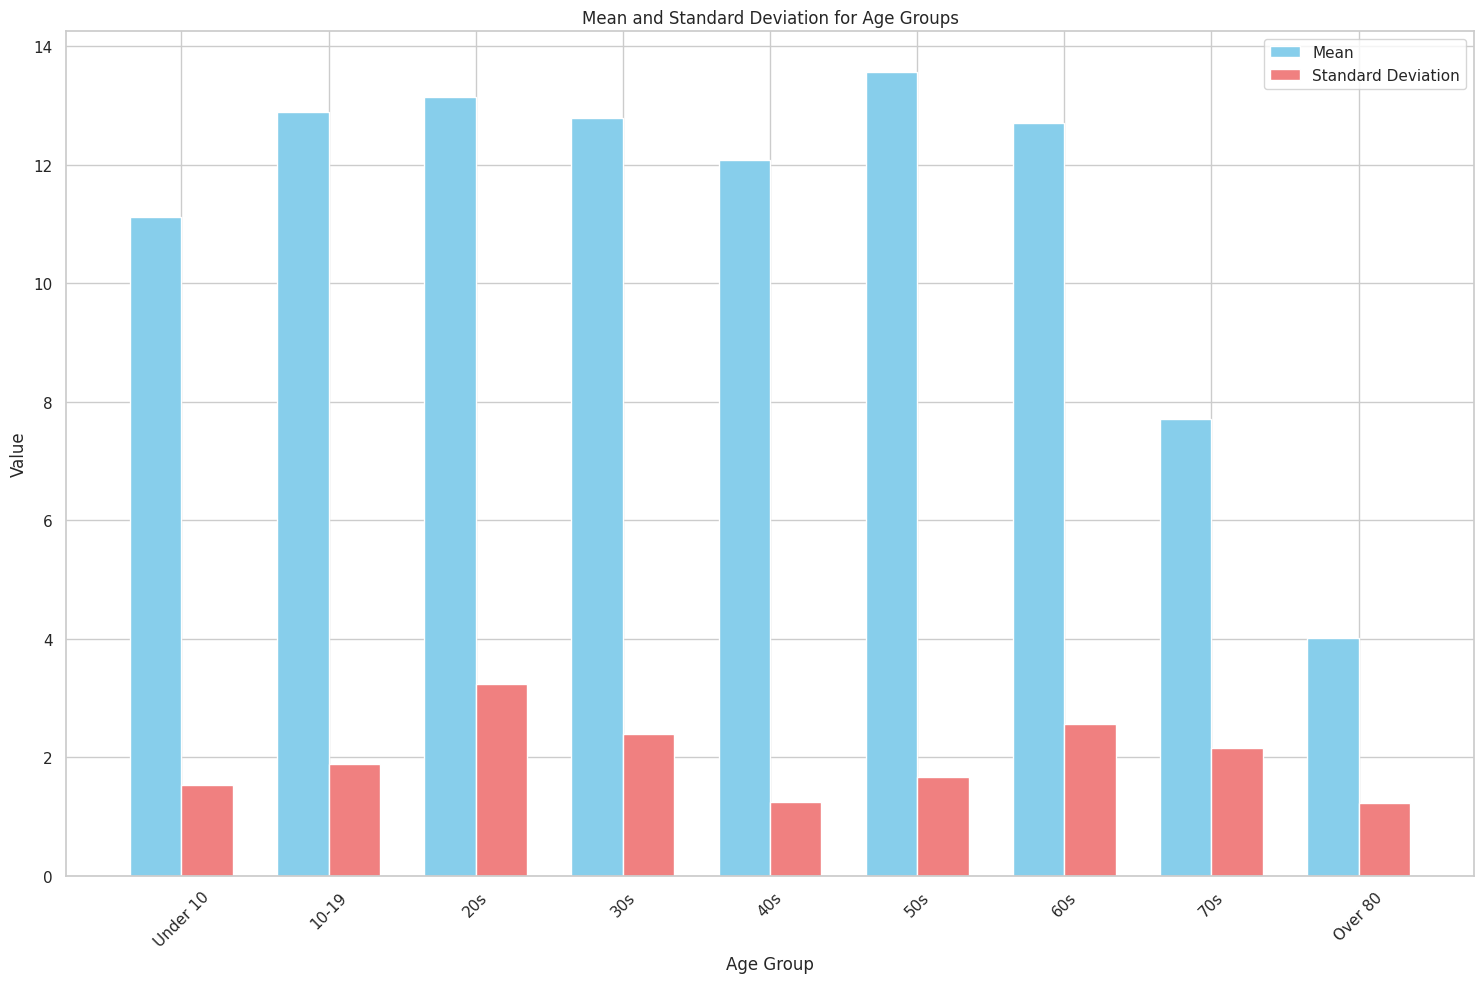

In [53]:
age_groups = ['Under 10', '10-19', '20s', '30s', '40s', '50s', '60s', '70s', 'Over 80']
mean_data = [11.117255, 12.883595, 13.143119, 12.782061, 12.076926, 13.573161, 12.702796, 7.704455, 4.015896]
std_data = [1.535440, 1.880894, 3.234639, 2.385573, 1.242096, 1.672587, 2.560234, 2.149805, 1.228584]

x = np.arange(len(age_groups))

# Set the width of the bars
bar_width = 0.35

# Create a grouped bar plot
plt.figure(figsize=(15, 10))
plt.bar(x - bar_width/2, mean_data, bar_width, label='Mean', color='skyblue')
plt.bar(x + bar_width/2, std_data, bar_width, label='Standard Deviation', color='lightcoral')

plt.xlabel('Age Group')
plt.ylabel('Value')
plt.title('Mean and Standard Deviation for Age Groups')
plt.xticks(x, age_groups, rotation=45)
plt.legend()
plt.tight_layout()

# Display the plot
plt.show()

In [55]:
import plotly.express as px


# Assuming state_distribution is a DataFrame with 'patient_state' and 'state_distribution' columns
state_distribution = df['patient_state'].value_counts().reset_index()
state_distribution.columns = ['patient_state', 'state_distribution']

# Calculate median age by state
median_age_by_state = df.groupby('patient_state')['patient_age'].median().reset_index()

# Merge state_distribution with median_age_by_state
merged_data = pd.merge(state_distribution, median_age_by_state, on='patient_state', how='left')

# Plot the US map with demographic information
fig = px.choropleth(merged_data,
                    locations='patient_state',
                    color='state_distribution',  # Color by population count
                    hover_name='patient_state',
                    hover_data=['state_distribution', 'patient_age'],
                    locationmode='USA-states',  # Specify location mode
                    scope='usa',
                    color_continuous_scale='Viridis',
                    title='US Map - Population Count and Median Age')

# Show the map
fig.update_layout(geo=dict(bgcolor='rgba(0,0,0,0)'),
                  coloraxis_colorbar=dict(title='Population Count'))
fig.show()

In [56]:
# Assuming state_distribution is a DataFrame with 'patient_state' and 'patient_count' columns
patient_count = df['patient_state'].value_counts().reset_index()
patient_count.columns = ['patient_state', 'patient_count']

# Plot the US map with patient count information only
fig = px.choropleth(patient_count,
                    locations='patient_state',
                    color='patient_count',  # Color by patient count
                    locationmode='USA-states',  # Specify location mode
                    scope='usa',
                    color_continuous_scale='Plasma',  # Use the "Plasma" color scale
                    title='US Map - Patient Count')

# Show the map
fig.update_layout(geo=dict(bgcolor='rgba(0,0,0,0)'),
                  coloraxis_colorbar=dict(title='Patient Count'))
fig.show()


In [57]:

# Assuming state_income is a DataFrame with 'patient_state' and 'income_household_median' columns
state_income = df.groupby('patient_state')['income_household_median'].median().reset_index()

# Plot the US map with median household income information
fig = px.choropleth(state_income,
                    locations='patient_state',
                    color='income_household_median',  # Color by median household income
                    locationmode='USA-states',  # Specify location mode
                    scope='usa',
                    color_continuous_scale='Plasma',  # Use the "Plasma" color scale
                    title='US Map - Median Household Income')

# Show the map
fig.update_layout(geo=dict(bgcolor='rgba(0,0,0,0)'),
                  coloraxis_colorbar=dict(title='Median Household Income'))
fig.show()


In [58]:


# Assuming state_income is a DataFrame with 'patient_state' and 'income_household_median' columns
state_income = df.groupby('patient_state')['income_individual_median'].median().reset_index()

# Plot the US map with median household income information
fig = px.choropleth(state_income,
                    locations='patient_state',
                    color='income_individual_median',  # Color by median household income
                    locationmode='USA-states',  # Specify location mode
                    scope='usa',
                    color_continuous_scale='Plasma',  # Use the "Plasma" color scale
                    title='US Map - Median Individual Income')

# Show the map
fig.update_layout(geo=dict(bgcolor='rgba(0,0,0,0)'),
                  coloraxis_colorbar=dict(title='Median Individual Income'))
fig.show()


In [59]:


# Assuming state_age is a DataFrame with 'patient_state' and 'patient_age' columns
state_age = df.groupby('patient_state')['patient_age'].mean().reset_index()

# Plot the US map with median patient age information
fig = px.choropleth(state_age,
                    locations='patient_state',
                    color='patient_age',  # Color by median patient age
                    hover_name='patient_state',
                    locationmode='USA-states',  # Specify location mode
                    scope='usa',
                    color_continuous_scale='Plasma',  # Use the "Plasma" color scale
                    title='US Map - Average Patient Age')

# Show the map
fig.update_layout(geo=dict(bgcolor='rgba(0,0,0,0)'),
                  coloraxis_colorbar=dict(title='Average Patient Age'))
fig.show()

In [60]:

# Assuming state_age is a DataFrame with 'patient_state' and 'health_uninsured' columns
state_age = df.groupby('patient_state')['health_uninsured'].mean().reset_index()

# Plot the US map with median patient age information
fig = px.choropleth(state_age,
                    locations='patient_state',
                    color='health_uninsured',  # Color by median patient age
                    hover_name='patient_state',
                    locationmode='USA-states',  # Specify location mode
                    scope='usa',
                    color_continuous_scale='Plasma',  # Use the "Plasma" color scale
                    title='US Map - Percentage of Population uninsured')

# Show the map
fig.update_layout(geo=dict(bgcolor='rgba(0,0,0,0)'),
                  coloraxis_colorbar=dict(title='Percentage of Population uninsured'))
fig.show()

In [61]:
import plotly.express as px
import pandas as pd

# Assuming state_treatment_delay is a DataFrame with 'patient_state' and 'treatment_pd' columns
state_treatment_delay = df.groupby('patient_state')['treatment_pd'].mean().reset_index()

# Plot the US map with average treatment delay information
fig = px.choropleth(state_treatment_delay,
                    locations='patient_state',
                    color='treatment_pd',  # Color by average treatment delay
                    hover_name='patient_state',
                    locationmode='USA-states',  # Specify location mode
                    scope='usa',
                    color_continuous_scale='Plasma',  # Use the "Plasma" color scale
                    title='US Map - Average Treatment Delay')

# Show the map
fig.update_layout(geo=dict(bgcolor='rgba(0,0,0,0)'),
                  coloraxis_colorbar=dict(title='Average Treatment Delay'))
fig.show()


In [63]:
# Select only the 'payer_type' column
payer_type_column = df[['payer_type']]

# Perform one-hot encoding
encoded_payer_type = pd.get_dummies(payer_type_column, prefix='payer_type', dtype=int)

# Concatenate the encoded DataFrame with the original DataFrame
df_encoded = pd.concat([df.drop(columns=['payer_type']), encoded_payer_type], axis=1)

# Print the encoded DataFrame
print(df_encoded.head())

   patient_id patient_state  patient_zip3  patient_age patient_gender  \
0      994155            CA           917           46              F   
1      154389            OH           451           63              F   
2      387343            TX           773           53              F   
3      921275            CA           928           50              F   
4      803454            NY           112           39              F   

  breast_cancer_diagnosis_code  \
0                       C50811   
1                       C50412   
2                       C50212   
3                         1749   
4                         1749   

                        breast_cancer_diagnosis_desc  \
0  Malignant neoplasm of ovrlp sites of right fem...   
1  Malig neoplasm of upper-outer quadrant of left...   
2  Malig neoplasm of upper-inner quadrant of left...   
3  Malignant neoplasm of breast (female), unspeci...   
4  Malignant neoplasm of breast (female), unspeci...   

   breast_cancer_di

In [64]:
import pandas as pd

# Assuming df is your DataFrame containing the data

# List of categorical columns to perform frequency encoding
categorical_columns = ['breast_cancer_diagnosis_code','metastatic_cancer_diagnosis_code', 'metastatic_first_treatment']

# Perform frequency encoding for each categorical column
for col in categorical_columns:
    # Calculate the frequency of each category
    frequency_map = df_encoded[col].value_counts(normalize=True)
    # Replace each category with its frequency
    df_encoded[col + '_frequency_encoded'] = df_encoded[col].map(frequency_map)

# Drop the original categorical columns
df_encoded.drop(columns=categorical_columns, inplace=True)

# Print the DataFrame with frequency encoded columns
print(df_encoded.head(10))

   patient_id patient_state  patient_zip3  patient_age patient_gender  \
0      994155            CA           917           46              F   
1      154389            OH           451           63              F   
2      387343            TX           773           53              F   
3      921275            CA           928           50              F   
4      803454            NY           112           39              F   
5      235192            IN           462           35              F   
6      693261            NM           877           58              F   
7      360339            AL           356           37              F   
8      114211            FL           330           67              F   
9      172133            CA           900           45              F   

                        breast_cancer_diagnosis_desc  \
0  Malignant neoplasm of ovrlp sites of right fem...   
1  Malig neoplasm of upper-outer quadrant of left...   
2  Malig neoplasm of upper-i

In [65]:
df_encoded.isnull().sum()

patient_id                                             0
patient_state                                         79
patient_zip3                                           0
patient_age                                            0
patient_gender                                         0
breast_cancer_diagnosis_desc                           0
breast_cancer_diagnosis_year                           0
region                                                 0
division                                               0
population                                             0
density                                                0
age_median                                             0
age_under_10                                           0
age_10_to_19                                           0
age_20s                                                0
age_30s                                                0
age_40s                                                0
age_50s                        

In [66]:

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso

# Assuming df is your DataFrame containing the data

# Split data into features (X) and target variable (y)
X = df_encoded.drop('treatment_pd', axis=1)  # Features
y = df_encoded['treatment_pd']  # Target variable

# Define numerical features
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[numerical_features])

# Define Lasso regression model
lasso = Lasso(alpha=0.1)  # You can adjust the alpha parameter to control the strength of regularization

# Fit the model
lasso.fit(X_scaled, y)

# Get the coefficients (importance) of each feature
feature_importance = lasso.coef_

# Print the importance of each feature
print("Feature Importance:")
for feature, importance in zip(X[numerical_features].columns, feature_importance):
    print(f"{feature}: {importance}")


Feature Importance:
patient_id: 0.34351601386087643
patient_zip3: -1.175929781181653
patient_age: 2.0219448526704253
breast_cancer_diagnosis_year: -59.23151297416785
population: -2.34953864948114
density: -1.4793306146061724
age_median: 5.002271183519605
age_under_10: 1.4578157564705907
age_10_to_19: -1.2086400828671984
age_20s: -0.0
age_30s: 3.3944305157465653
age_40s: 1.3635395338921223
age_50s: 0.9767942050318689
age_60s: -0.0
age_70s: -0.0
age_over_80: -3.8429345658433363
male: 0.9149032784796711
female: -0.0
married: -0.08229645551564922
divorced: -4.244165919309581
never_married: 0.23145815828050587
widowed: 3.0150388743365677
family_size: -1.5637979235763002
family_dual_income: -0.07292159798712484
income_household_median: 0.0
income_household_under_5: -0.0
income_household_5_to_10: 0.6096567538369976
income_household_10_to_15: -0.2815634801519593
income_household_15_to_20: -3.633612007492364
income_household_20_to_25: -1.8035836675262784
income_household_25_to_35: 0.43287862034

In [67]:
df_encoded.dtypes

patient_id                                               int64
patient_state                                           object
patient_zip3                                             int64
patient_age                                              int64
patient_gender                                        category
breast_cancer_diagnosis_desc                          category
breast_cancer_diagnosis_year                             int64
region                                                category
division                                              category
population                                               int64
density                                                float64
age_median                                             float64
age_under_10                                           float64
age_10_to_19                                           float64
age_20s                                                float64
age_30s                                                

In [69]:
# Dictionary to store non-zero coefficients and their corresponding feature names
non_zero_features = {}

# Loop through the feature importance dictionary
for feature, importance in zip(X[numerical_features].columns, feature_importance):
    if importance != 0:
        non_zero_features[feature] = importance
non_columns=[]
# Print non-zero features and their importance
for feature, importance in non_zero_features.items():
    print(f"{feature}: {importance}")
    non_columns.append(feature)

# If you want to store the non-zero coefficients and their feature names in a variable, you can do:
non_zero_coefficients = [(feature, importance) for feature, importance in non_zero_features.items()]


patient_id: 0.34351601386087643
patient_zip3: -1.175929781181653
patient_age: 2.0219448526704253
breast_cancer_diagnosis_year: -59.23151297416785
population: -2.34953864948114
density: -1.4793306146061724
age_median: 5.002271183519605
age_under_10: 1.4578157564705907
age_10_to_19: -1.2086400828671984
age_30s: 3.3944305157465653
age_40s: 1.3635395338921223
age_50s: 0.9767942050318689
age_over_80: -3.8429345658433363
male: 0.9149032784796711
married: -0.08229645551564922
divorced: -4.244165919309581
never_married: 0.23145815828050587
widowed: 3.0150388743365677
family_size: -1.5637979235763002
family_dual_income: -0.07292159798712484
income_household_5_to_10: 0.6096567538369976
income_household_10_to_15: -0.2815634801519593
income_household_15_to_20: -3.633612007492364
income_household_20_to_25: -1.8035836675262784
income_household_25_to_35: 0.43287862034303765
income_household_35_to_50: -2.2001889281902978
income_household_50_to_75: 0.9455961942113671
income_household_75_to_100: -1.9159